<a href="https://colab.research.google.com/github/vladimyr02/cd-Vladimyr-Gonzalez-2023/blob/main/Taller8ClaseCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [3]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,25/01/2020,1,2020,45,1,F,170,68,276,1,5121,Contributivo,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,NaN,1,NaN,6/04/1974,NaN,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,16/01/2020,1,2020,46,1,F,170,68,276,1,7732,Subsidiado,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,13/01/2020,1,NaN,29/09/1973,NaN,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,9/01/2020,1,2020,27,1,F,170,68,276,1,2221,Contributivo,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,NaN,1,NaN,10/08/1992,NaN,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,15/01/2020,1,2020,8,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,12/01/2020,1,NaN,17/04/2019,NaN,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,7/01/2020,1,2020,2,1,M,170,68,276,1,9997,Contributivo,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,NaN,1,NaN,7/06/2017,NaN,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [5]:
df.isnull().sum()

ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [6]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [7]:
columnas_objeto = df.select_dtypes(include=['object']).columns
df = df.drop(columnas_objeto, axis=1)
df.drop("fecha_defuncion", axis=1, inplace=True)
df.drop("certif_defuncion", axis=1, inplace=True)

In [8]:
df.head(10)

,ID,semana,año,edad_,uni_med_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud
0,1,1,2020,25,1,170,68,276,1,2411,2,2,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.076011,-73.102501
1,2,1,2020,24,1,170,68,276,1,9997,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7.079495,-73.105400
2,3,1,2020,58,1,170,68,276,1,9999,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,7.090290,-73.091003
3,4,1,2020,29,1,170,68,276,1,4121,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067435,-73.090958
4,5,1,2020,56,1,170,68,276,1,9210,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,7.066905,-73.104980
5,6,1,2020,45,1,170,68,276,1,5121,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,7.073368,-73.088821
6,7,1,2020,46,1,170,68,276,1,7732,2,2,2,2,2,2,2,2,1,1,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,7.080947,-73.089188
7,8,1,2020,27,1,170,68,276,1,2221,2,2,2,2,2,2,2,1,2,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,7.084087,-73.085953
8,9,1,2020,8,2,170,68,276,1,9999,2,2,2,2,2,2,2,2,1,1,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,7.083333,-73.102295
9,10,1,2020,2,1,170,68,276,1,9997,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067431,-73.097923


In [9]:
from sklearn.preprocessing import StandardScaler

# Supongamos que 'df' es tu DataFrame con los datos a escalar
# Seleccionamos solo las columnas numéricas para escalar
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
datos_escalados = StandardScaler().fit_transform(df[columnas_numericas])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

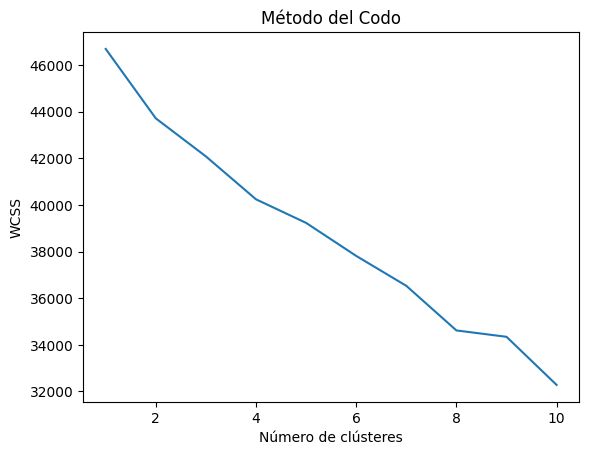

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):  # Probamos con un número de clústeres de 1 a 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(datos_escalados)
    wcss.append(kmeans.inertia_)  # Inertia es la suma de cuadrados intra-cluster

# Graficar la suma de cuadrados intra-cluster (WCSS) para cada número de clústeres
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

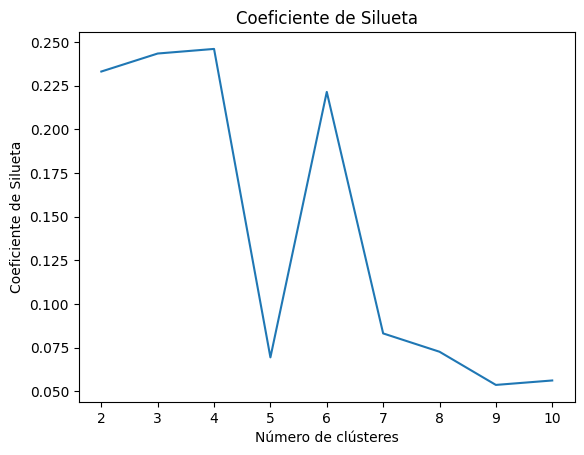

Número óptimo de clústeres según coeficiente de silueta: 4


In [11]:
from sklearn.metrics import silhouette_score
import numpy as np

sil_scores = []
for i in range(2, 11):  # Probamos con un número de clústeres de 2 a 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(datos_escalados)
    labels = kmeans.labels_
    sil_score = silhouette_score(datos_escalados, labels)
    sil_scores.append(sil_score)

# Graficar el coeficiente de silueta para cada número de clústeres
plt.plot(range(2, 11), sil_scores)
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.show()

# Imprimir el número óptimo de clústeres según el coeficiente de silueta
num_optimo_clusters = np.argmax(sil_scores) + 2  # Sumamos 2 porque comenzamos desde 2 clústeres
print('Número óptimo de clústeres según coeficiente de silueta:', num_optimo_clusters)


In [12]:
from sklearn.cluster import KMeans

# Supongamos que 'datos_escalados' es tu conjunto de datos escalados
num_optimo_clusters = 3  # Ejemplo: el número óptimo de clústeres determinado anteriormente

# Crear una instancia del modelo K-Means
kmeans_model = KMeans(n_clusters=num_optimo_clusters, init='k-means++', random_state=42)

# Entrenar el modelo
kmeans_model.fit(datos_escalados)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [13]:
# Obtener las etiquetas de clúster para cada punto de datos
etiquetas = kmeans_model.labels_

# Agregar las etiquetas al DataFrame original o crear un nuevo DataFrame
df['Cluster'] = etiquetas


In [14]:
print("Grupos:")
print(df['Cluster'].value_counts())


Grupos:
1    974
0    280
2      8
Name: Cluster, dtype: int64
